In [526]:
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/rahmi/Desktop/nyc-east-river-bicycle-counts.csv")
data.head(5)

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [527]:
data.shape[0]

210

In [481]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
Unnamed: 0             210 non-null int64
Date                   210 non-null object
Day                    210 non-null object
High Temp (°F)         210 non-null float64
Low Temp (°F)          210 non-null float64
Precipitation          210 non-null object
Brooklyn Bridge        210 non-null float64
Manhattan Bridge       210 non-null int64
Williamsburg Bridge    210 non-null float64
Queensboro Bridge      210 non-null float64
Total                  210 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 18.1+ KB


In [482]:
data.describe()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,60.580000,46.413333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,60.765944,11.183223,9.522796,981.237786,1704.731356,1814.039499,1099.254419,5569.173496
min,0.000000,39.900000,26.100000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,52.250000,55.000000,44.100000,1447.000000,2617.000000,3282.000000,2457.000000,9596.000000
50%,104.500000,62.100000,46.900000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,156.750000,68.000000,50.000000,3147.000000,5309.000000,6030.000000,4192.000000,18315.000000
max,209.000000,81.000000,66.000000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


There are no missing values in the data

In [483]:
#checking missing values
data.isnull().values.any()

False

In [484]:
#dropping the unnamed column
data = data.drop("Unnamed: 0",axis = 1)

In [485]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
Date                   210 non-null object
Day                    210 non-null object
High Temp (°F)         210 non-null float64
Low Temp (°F)          210 non-null float64
Precipitation          210 non-null object
Brooklyn Bridge        210 non-null float64
Manhattan Bridge       210 non-null int64
Williamsburg Bridge    210 non-null float64
Queensboro Bridge      210 non-null float64
Total                  210 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 16.5+ KB


In [486]:
data['year'], data['month'], data['date'] = zip(*data['Date'].map(lambda x: x.split('-')))

In [487]:
data.head(1)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,year,month,date
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,2016,04,01 00:00:00


In [488]:
data['day'], data['time'] = zip(*data['date'].map(lambda x: x.split(' ')))

In [489]:
data.head(1)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,year,month,date,day,time
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,2016,04,01 00:00:00,01,00:00:00


In [490]:
data = data.drop('date',axis = 1)

In [491]:
#time has all 0 hours,0 minutes, 0 seconds. so not so useful
data = data.drop('time',axis = 1)

In [492]:
data.head(1)

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,year,month,day
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,2016,04,01


In [493]:
count_per_Brookbridge_year = data['Brooklyn Bridge'].agg(np.sum)
count_per_Manhbridge_year = data['Manhattan Bridge'].agg(np.sum)
count_per_williambridge_year = data['Williamsburg Bridge'].agg(np.sum)
count_per_Queensbridge_year = data['Queensboro Bridge'].agg(np.sum)

In [494]:
count_per_bridge = pd.DataFrame({'Brooklyn Bridge': count_per_Brookbridge_year, 'Manhattan Bridge': count_per_Manhbridge_year,
                  'Williamsburg Bridge': count_per_williambridge_year,'Queensboro Bridge':count_per_Queensbridge_year}, index=[0])


In [495]:
import matplotlib.pyplot as plt

count_per_bridge.plot(kind ='bar')
plt.xlabel("Type of Bridge")
plt.ylabel("Count of bicycles")
plt.title("Count of bicycles went on each Bridge")

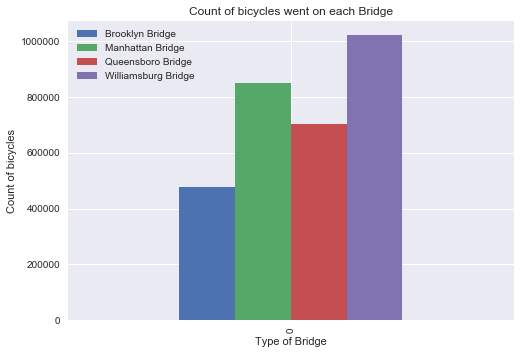

In [496]:
plt.show()

The plot shows that more number of bicycles went through Williamsburg bridge in April 2016 

The data belongs to single month of a year

In [497]:
data['year'].value_counts()

2016    210
Name: year, dtype: int64

In [498]:
data['month'].value_counts()

04    210
Name: month, dtype: int64

In [499]:
data['day'].value_counts()

11    7
30    7
29    7
26    7
10    7
16    7
22    7
24    7
21    7
20    7
18    7
03    7
15    7
04    7
14    7
02    7
25    7
19    7
01    7
27    7
13    7
06    7
12    7
08    7
23    7
09    7
17    7
07    7
05    7
28    7
Name: day, dtype: int64

In [500]:
#the Date and Day columns are same
data[data['Date'] != data['Day']]

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,year,month,day


In [501]:
#So drop Day column
data = data.drop("Day",axis = 1)

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
Date                   210 non-null object
High Temp (°F)         210 non-null float64
Low Temp (°F)          210 non-null float64
Precipitation          210 non-null object
Brooklyn Bridge        210 non-null float64
Manhattan Bridge       210 non-null int64
Williamsburg Bridge    210 non-null float64
Queensboro Bridge      210 non-null float64
Total                  210 non-null int64
year                   210 non-null object
month                  210 non-null object
day                    210 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 19.8+ KB


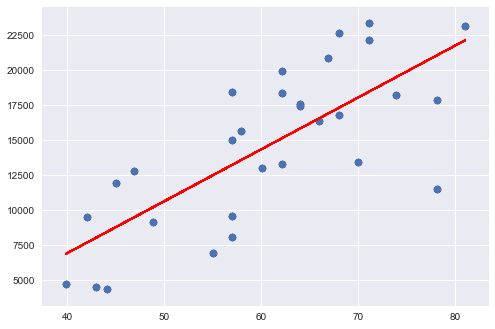

In [503]:
#factors affecting bike volumes
x = data['High Temp (°F)']
y = data['Total']

#fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y)

plt.show()

The Total number of bikes are increasing with precipitation

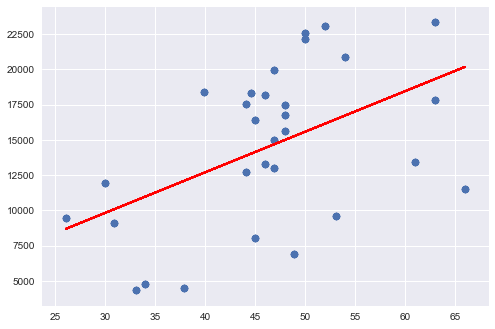

In [504]:
#factors affecting bike volumes
x = data['Low Temp (°F)']
y = data['Total']

#fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y)

plt.show()

In [505]:
data['Avg_Temp'] = (data['Low Temp (°F)'] + data['High Temp (°F)'])/2

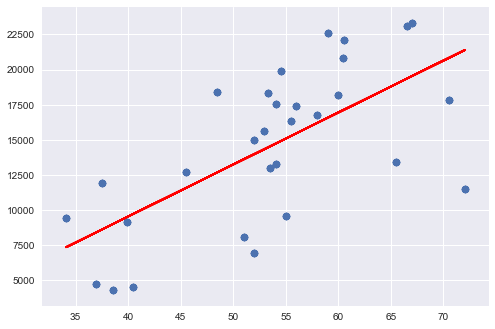

In [506]:
x = data['Avg_Temp']
y = data['Total']

#fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y)

plt.show()

Can Say that on avaerage, as the temperature is increasing the number of bikes riding is more.

The trend it is not so clear need further investigation

In [507]:
df = data['Precipitation'].str.split(' ', 1, expand=True)
data['Prec'] = df[0]

In [508]:
#'T' in precipitation is very negligible and can't be measured by instrument. So dropping those rows
final = data[data.Prec != 'T']

In [509]:
final.shape

(203, 14)

In [510]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 209
Data columns (total 14 columns):
Date                   203 non-null object
High Temp (°F)         203 non-null float64
Low Temp (°F)          203 non-null float64
Precipitation          203 non-null object
Brooklyn Bridge        203 non-null float64
Manhattan Bridge       203 non-null int64
Williamsburg Bridge    203 non-null float64
Queensboro Bridge      203 non-null float64
Total                  203 non-null int64
year                   203 non-null object
month                  203 non-null object
day                    203 non-null object
Avg_Temp               203 non-null float64
Prec                   203 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 23.8+ KB


In [511]:
final['Prec'].value_counts()

0       119
0.09     21
0.01     21
0.2       7
0.24      7
0.05      7
0.16      7
0.15      7
0.47      7
Name: Prec, dtype: int64

In [512]:
final[["day","Prec"]] = final[["day","Prec"]].astype(float)

/Users/rahmi/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


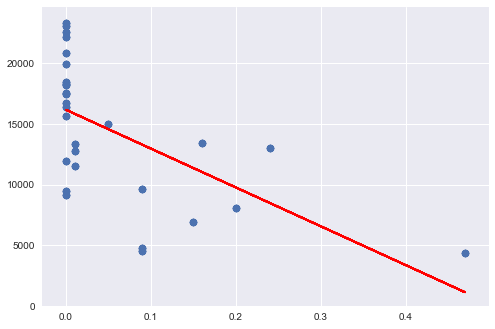

In [513]:
#factors affecting bike volumes
x = final['Prec']
y = final['Total']
#fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y)

plt.show()

It shows that most of the people prefer to go on biking only when the precipitation is less

In [514]:
final = final.drop(["Brooklyn Bridge","Manhattan Bridge","Williamsburg Bridge","Queensboro Bridge","Precipitation"],axis = 1)

In [515]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 209
Data columns (total 9 columns):
Date              203 non-null object
High Temp (°F)    203 non-null float64
Low Temp (°F)     203 non-null float64
Total             203 non-null int64
year              203 non-null object
month             203 non-null object
day               203 non-null float64
Avg_Temp          203 non-null float64
Prec              203 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 25.9+ KB


In [516]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 209
Data columns (total 9 columns):
Date              203 non-null object
High Temp (°F)    203 non-null float64
Low Temp (°F)     203 non-null float64
Total             203 non-null int64
year              203 non-null object
month             203 non-null object
day               203 non-null float64
Avg_Temp          203 non-null float64
Prec              203 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 25.9+ KB


In [517]:
final = final.drop(["Date","year","month"],axis = 1)

In [518]:
final = final.drop(["Avg_Temp"],axis = 1)

In [519]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 209
Data columns (total 5 columns):
High Temp (°F)    203 non-null float64
Low Temp (°F)     203 non-null float64
Total             203 non-null int64
day               203 non-null float64
Prec              203 non-null float64
dtypes: float64(4), int64(1)
memory usage: 19.5 KB


In [520]:
#Regression model to predict the number of bikers 
from sklearn.cross_validation import train_test_split

x_train, x_val, y_train, y_val = train_test_split(final.drop(['Total'], axis = 1),
                                    final['Total'],test_size = 0.3, random_state = 42)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)


(142, 4)
(61, 4)
(142,)
(61,)


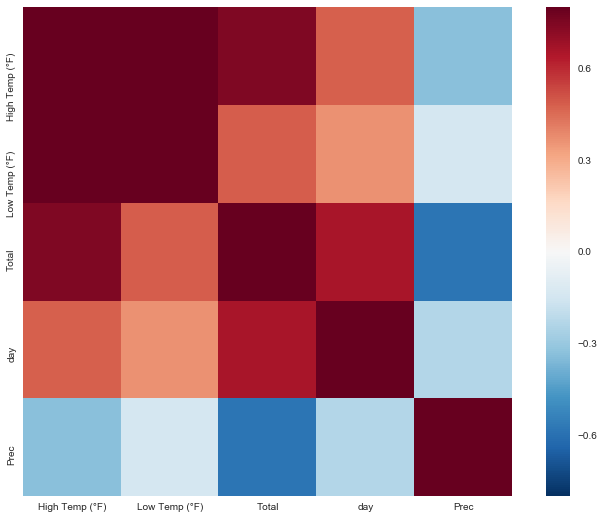

In [521]:
#varaibles influencing
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = final.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [522]:
#Here we consider Average temperature and day to calculate the total rides
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_val)

In [523]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_val, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, y_pred))


Coefficients: 
 [   331.6729008    -161.23054753    240.46562331 -17929.3007221 ]
Mean squared error: 7878083.62
Variance score: 0.75


In [524]:
from sklearn.tree import DecisionTreeRegressor
clf_rf = DecisionTreeRegressor(max_depth= 6, min_samples_leaf = 3,random_state=12)
clf_rf.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=12, splitter='best')

In [525]:
from sklearn.metrics import mean_squared_error

pred = clf_rf.predict(x_val)
forest_mse = mean_squared_error(y_val, pred)
#print(y_val, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

670.6425839393892

In [479]:
from sklearn.grid_search import GridSearchCV

param_grid = {#'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [2,3,4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              #'n_estimators':[30,40,50,60,70]
              # 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
              }

est = DecisionTreeRegressor()
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid = param_grid, n_jobs=4).fit(x_train, y_train)

# best hyperparameter setting
gs_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 3}